In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dt = pd.read_csv('Winter_Fashion_Trends_Dataset.csv')

print(dt.head(5))
print('-----------')
print(dt.tail(5))
print('-----------')
print(dt.info())

   ID       Brand Category  Color   Material       Style  Gender       Season  \
0   1      Adidas   Gloves  Brown  Polyester  Streetwear   Women  Winter 2025   
1   2       Gucci   Gloves    Red    Leather      Sporty     Men  Winter 2023   
2   3         H&M     Coat  Brown     Fleece  Streetwear  Unisex  Winter 2025   
3   4  North Face     Coat   Blue   Cashmere      Formal     Men  Winter 2024   
4   5       Mango  Thermal   Blue   Cashmere      Formal  Unisex  Winter 2025   

   Price(USD)  Popularity_Score  Customer_Rating Trend_Status  
0      244.06               6.0              4.9     Trending  
1      366.73               8.8              3.3     Trending  
2      741.55               4.8              3.5     Trending  
3      116.09               7.5              3.1     Outdated  
4      193.16               7.8              4.3     Outdated  
-----------
      ID   Brand Category  Color   Material   Style  Gender       Season  \
145  146   Mango     Coat  Green       Do

In [ ]:
print(dt.isnull().sum())

dt = dt.fillna(0)

ID                  0
Brand               0
Category            0
Color               0
Material            0
Style               0
Gender              0
Season              0
Price(USD)          0
Popularity_Score    0
Customer_Rating     0
Trend_Status        0
dtype: int64


In [ ]:
dup_count = dt.duplicated().sum()
print('Количество дупликатов:', dup_count)
dt = dt.drop_duplicates()

Количество дупликатов: 0


In [ ]:
print(dt.describe())

print('----------------')
unique = dt.nunique()
print('Количество уникальных значений в каждом столбце:')
print(unique)
for col in dt.columns[1:8]:
  print('----------------')
  print(col, dt.value_counts(col))


               ID  Price(USD)  Popularity_Score  Customer_Rating
count  150.000000  150.000000        150.000000       150.000000
mean    75.500000  443.105933          5.763333         3.802667
std     43.445368  211.630074          2.655763         0.719428
min      1.000000   30.070000          1.100000         2.500000
25%     38.250000  292.807500          3.400000         3.125000
50%     75.500000  445.820000          5.850000         3.800000
75%    112.750000  631.537500          8.225000         4.400000
max    150.000000  788.030000         10.000000         5.000000
----------------
Количество уникальных значений в каждом столбце:
ID                  150
Brand                10
Category             10
Color                10
Material              7
Style                 5
Gender                3
Season                3
Price(USD)          150
Popularity_Score     78
Customer_Rating      26
Trend_Status          4
dtype: int64
----------------
Brand Brand
Mango         25
No

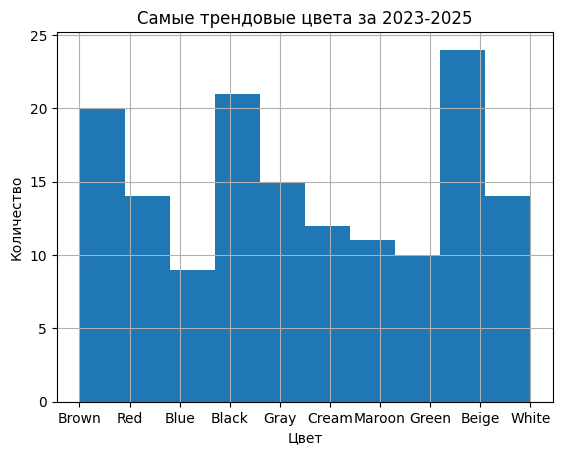

In [ ]:
dt['Color'].hist()

plt.xlabel('Цвет')
plt.ylabel('Количество')
plt.title('Самые трендовые цвета за 2023-2025')
plt.show()

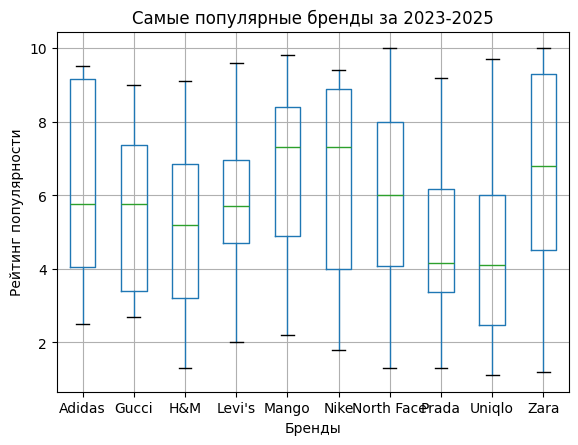

In [ ]:
dt.boxplot(column='Popularity_Score',by='Brand')
plt.xlabel('Бренды')
plt.suptitle('')
plt.ylabel('Рейтинг популярности')
plt.title('Самые популярные бренды за 2023-2025')
plt.show()

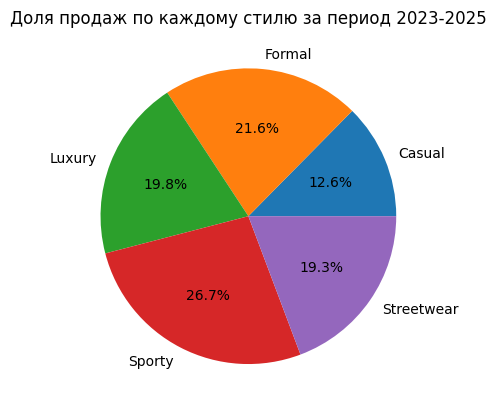

In [ ]:
Price_Sum = dt.groupby('Style')['Price(USD)'].sum()
Price_Sum.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Доля продаж по каждому стилю за период 2023-2025')
plt.show()

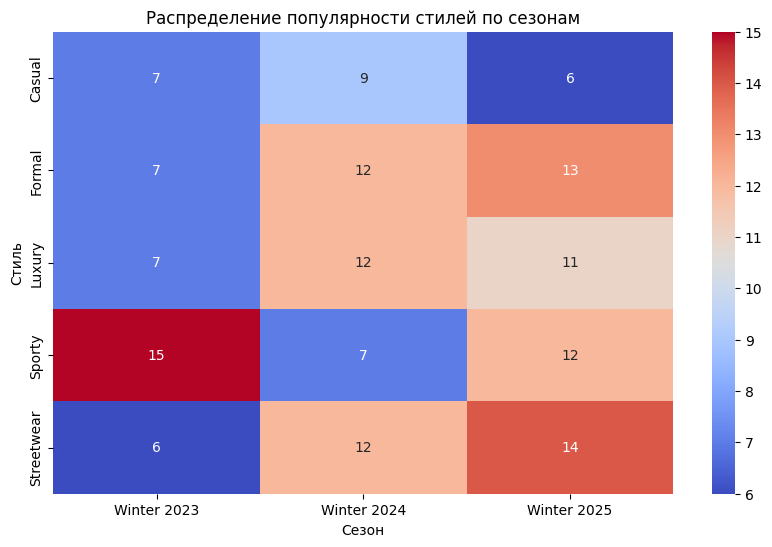

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(dt['Style'],dt['Season']), cmap='coolwarm', annot=True)
plt.title('Распределение популярности стилей по сезонам')
plt.ylabel('Стиль')
plt.xlabel('Сезон')
plt.show()

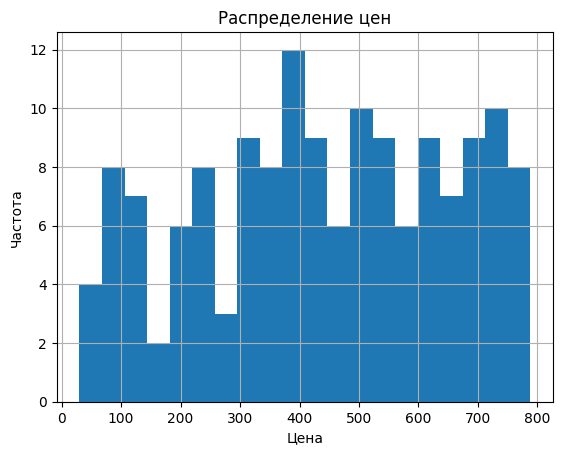

In [ ]:
dt['Price(USD)'].hist(bins=20)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен')
plt.show()

In [ ]:
print('Средняя цена по брендам:')
print(dt.groupby('Brand')['Price(USD)'].mean().sort_values())

print('----------------')

print('Медиана популярности по категориям:')
print(dt.groupby('Category')['Popularity_Score'].median().sort_values(ascending=False))

print('----------------')

print('Сводная таблица: средняя оценка покупателей по категории и сезону')
pivot_rating = dt.pivot_table(values='Customer_Rating', index='Category', columns='Season', aggfunc='mean')
print(pivot_rating)

Средняя цена по брендам:
Brand
North Face    368.169000
Nike          373.648462
Zara          402.763846
Prada         437.876250
Mango         440.217600
H&M           443.940000
Gucci         458.994286
Levi's        459.953750
Uniqlo        536.190625
Adidas        565.399000
Name: Price(USD), dtype: float64
----------------
Медиана популярности по категориям:
Category
Boots       7.30
Sweater     6.60
Coat        6.20
Gloves      6.10
Beanie      5.90
Hoodie      5.50
Thermal     5.10
Cardigan    4.90
Jacket      4.55
Scarf       4.50
Name: Popularity_Score, dtype: float64
----------------
Сводная таблица: средняя оценка покупателей по категории и сезону
Season    Winter 2023  Winter 2024  Winter 2025
Category                                       
Beanie       3.620000     4.350000     3.840000
Boots        2.900000     3.433333     3.566667
Cardigan     3.233333     3.575000     4.125000
Coat         4.200000     3.957143     3.150000
Gloves       3.480000     3.825000     4.280